!pip install keras==2.2.4 # critical dependency, 


In [1]:
# Import neural network libraries
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from keras.engine import Layer

Using TensorFlow backend.


In [2]:
# Initialize tensorflow/keras session
sess = tf.Session()
K.set_session(sess)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
filepath = "../data/enron/emails.csv"

# Read the data into a pandas dataframe called emails
emails = pd.read_csv(filepath)

print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(emails.head())

Successfully loaded 517401 rows and 2 columns!
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [4]:
# take a closer look at the first email
print(emails.loc[0]["message"])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [5]:
import email

def extract_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages

bodies = extract_messages(emails)

Successfully retrieved message body from e-mails!


In [6]:
# extract random 10000 enron email bodies for building dataset
import random
bodies_df = pd.DataFrame(random.sample(bodies, 10000))

# expand default pandas display options to make emails more clearly visible when printed
pd.set_option('display.max_colwidth', 300)

bodies_df.head() # you could do print(bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames

,0
0,"Message-ID: <00c001c05063$dd0bdb20$1eccdacf@tinktink>\nFrom: Mark <mark7@ev1.net>\nTo: Danel <danelrr@yahoo.com>\nSubject: Fw: Fw: Ooooohhh, Aaahhhhhhh!!\nDate: Fri, 17 Nov 2000 00:52:08 -0600\nX-Mailer: Internet Mail Service (5.5.2650.21)\nMime-Version: 1.0\nContent-Type: multipart/mixed; bound..."
1,Pretty funny.\n---------------------- Forwarded by Phillip M Love/HOU/ECT on 11/13/2000 \n10:10 AM ---------------------------\n \n\tEnron North America Corp.\n\t\n\tFrom: Darron C Giron 11/13/2000 10:09 AM\n\t\n\nTo: Phillip M Love/HOU/ECT@ECT\ncc: \nSubject: Kids ...
2,"Oh yea!! what is up///// Are you going back to Manhattan for PIG?? I hear \nKalberg is going to streak aggievile, lose his glasses, puke on himself, then \npiss in his bed! \nAnyway,,, I was just out your way snowboarding in beaver Creek.... it was \nawesome! \nWhere is Besch at anyway,,,..."
3,Can y'all help me get the document below signed by an officer of ECC and \nreturn the originally signed document to me. I will send them all out \ntogether back to the counterparty. FYI-Andy Zipper is second in command to \nLouise Kitchen for EnronOnline. Thanks for your help!\n----- Forwarde...
4,"What time do you get off? Do you want to meet somewhere in between? Your\nplace?\n\nBrad\n\n\n-----Original Message-----\nFrom: Kim.Ward@enron.com [mailto:Kim.Ward@enron.com]\nSent: Wednesday, October 24, 2001 10:12 AM\nTo: Brad.King@conoco.com\nCc: 3\nSubject: RE: FW: Forward Warning\n\n\nof ..."


In [7]:
filepath = "../data/fradulent_emails.txt"
with open(filepath, 'r',encoding="latin1") as file:
    data = file.read()
    
# split on a code word appearing close to the beginning of each email
fraud_emails = data.split("From r")

print("Successfully loaded {} spam emails!".format(len(fraud_emails)))

Successfully loaded 3978 spam emails!


In [8]:
fraud_bodies = extract_messages(pd.DataFrame(fraud_emails,columns=["message"],dtype=str))
fraud_bodies_df = pd.DataFrame(fraud_bodies[1:])

fraud_bodies_df.head() # you could do print(fraud_bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames

Successfully retrieved message body from e-mails!


,0
0,"FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\n\nURGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\n\nDEAR FRIEND,\n\nI AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY G..."
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.\n\nAfter the sudden death of the former Head of s..."
2,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
3,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
4,"Dear sir, \n \nIt is with a heart full of hope that I write to seek your help in respect of the context below. I am Mrs. Maryam Abacha the former first lady of the former Military Head of State of Nigeria General Sani Abacha whose sudden death occurred on 8th of June 1998 as a result of cardiac ..."


In [9]:
Nsamp =1000 # number of samples to generate in each class - 'spam', 'not spam'
maxtokens = 200 # the maximum number of tokens per document
maxtokenlen = 100 # the maximum length of each token

In [10]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = str(row).split(" ")[:maxtokens]
    return tokens

In [11]:
import re

def reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', "", token)
            token = token[:maxtokenlen] # truncate token
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

In [3]:
import nltk

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
 
dl = nltk.downloader.Downloader('http://nltk.org/nltk_data/index.xml')
# nltk.download('stopwords')
dl.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lidayuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import random

# Convert everything to lower-case, truncate to maxtokens and truncate each token to maxtokenlen
EnronEmails = bodies_df.iloc[:,0].apply(tokenize)
EnronEmails = EnronEmails.apply(stop_word_removal)
EnronEmails = EnronEmails.apply(reg_expressions)
EnronEmails = EnronEmails.sample(Nsamp)

SpamEmails = fraud_bodies_df.iloc[:,0].apply(tokenize)
SpamEmails = SpamEmails.apply(stop_word_removal)
SpamEmails = SpamEmails.apply(reg_expressions)
SpamEmails = SpamEmails.sample(Nsamp)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values

In [14]:
print("Shape of combined data is:")
print(raw_data.shape)
print("Data represented as numpy array is:")
print(raw_data)

# corresponding labels
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))

Shape of combined data is:
(2000,)
Data represented as numpy array is:
[list(['frompaulson', 'bensontelfaxjohannesburgsouth', 'africaattn', 'managing', 'directorceourgent', 'and', 'confidential', 'business', 'proposali', 'mrpaulson', 'benson', 'elder', 'son', 'late', 'mrjames', 'benson', 'zimbabwe', 'i', 'got', 'contactaddress', 'south', 'african', 'chambers', 'commerce', 'industry', 'please', 'worry', 'during', 'currentcrises', 'farmers', 'zimbabwe', 'supporters', 'president', 'robert', 'mugabe', 'claim', 'white', 'owned', 'farms', 'country', 'he', 'ordered', 'white', 'farmers', 'surrender', 'farms', 'party', 'members', 'followers', 'my', 'father', 'was', 'one', 'biggest', 'farmers', 'country', 'although', 'black', 'indegene', 'support', 'presidents', 'political', 'ideologytherefore', 'presidents', 'supporters', 'invaded', 'fathers', 'farm', 'burnt', 'down', 'everything', 'killed', 'confiscated', 'investments', 'after', 'death', 'fathermy', 'mother', 'i', 'together', 'younger', 'broth

In [15]:
# function for shuffling data
def unison_shuffle(a, b):
    p = np.random.permutation(len(b))
    data = a[p]
    header = np.asarray(b)[p]
    return data, header

# function for converting data into the right format, due to the difference in required format from sklearn models
# we expect a single string per email here, versus a list of tokens for the sklearn models previously explored
def convert_data(raw_data,header):
    converted_data, labels = [], []
    for i in range(raw_data.shape[0]):
        # combine list of tokens representing each email into single string
        out = ' '.join(raw_data[i])
        converted_data.append(out)
        labels.append(header[i])
        #print(i)
    converted_data = np.array(converted_data, dtype=object)[:, np.newaxis]
    return converted_data, np.array(labels)

raw_data, header = unison_shuffle(raw_data, header)

# split into independent 70% training and 30% testing sets
idx = int(0.7*raw_data.shape[0])
# 70% of data for training
train_x, train_y = convert_data(raw_data[:idx],header[:idx])
# remaining 30% for testing
test_x, test_y = convert_data(raw_data[idx:],header[idx:])

print("train_x/train_y list details, to make sure it is of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(train_y.shape)

train_x/train_y list details, to make sure it is of the right form:
1400
[['greetingcdear i pray god message reaches wonderful spiritei making contact based trust confidence irrespective fact met nature situation i found self nowe name martin goudalec republic cote divoiree got email address internet cwhen searching reliable god fearing personcwho betray meethere information i would like keep confidentialethere sum amount money e million us dollars late father mrehassan goudalec chairman fpresidentfceoccacaocafe  agroalimentary industries plcescafecao deposited finance house assassinated rebels sometime ago political crisis country assassinated other government officials during official hours rebel troops stormed raided cacaocafe industry office heat crisis in countrye help french soldiersc escaped senegalc noweam whole documents concerning deposit made investment e i want investing money']
 ['foreign payment liaison officesecond avenue seattle washingtonwa  usasecurity telfax no dear 

In [16]:
class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024 # initialize output dimension of ELMo embedding
        self.trainable=True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape): # function for building ELMo embedding
        # self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable,
        #                        name="{}_module".format(self.name)) # download pretrained ELMo model
        
        self.elmo = hub.Module('https://storage.googleapis.com/tfhub-modules/google/elmo/2.tar.gz', trainable=self.trainable,
                       name="{}_module".format(self.name))
        # extract trainable parameters, which are only a small subset of the total - this is a constraint of
        # the tf hub module as shared by the authors - see https://tfhub.dev/google/elmo/2
        # the trainable parameters are 4 scalar weights on the sum of the outputs of ELMo layers 
        self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None): # specify function for calling embedding
        result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                      as_dict=True,
                      signature='default',
                      )['default']
        return result

    def compute_output_shape(self, input_shape): # specify output shape
        return (input_shape[0], self.dimensions)

In [17]:
# Function to build overall model
def build_model():
    input_text = layers.Input(shape=(1,), dtype="string")
    embedding = ElmoEmbeddingLayer()(input_text)
    dense = layers.Dense(256, activation='relu')(embedding)
    pred = layers.Dense(1, activation='sigmoid')(dense) # we could use sigmoid activation as well, but we choose softmax
                                                        # to enable us use sparse_categorical_crossentropy and 
                                                        # sparse_categorical_accuracy below
    
    model = Model(inputs=[input_text], outputs=pred)
    # use sparse_categorical_crossentropy and sparse_categorical_accuracy do avoid having to
    # one-hot encode the labels
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [18]:
# Build and fit
model = build_model()
history = model.fit(train_x, 
          train_y,
          validation_data=(test_x, test_y),
          epochs=5,
          batch_size=32)



INFO:tensorflow:Saver not created because there are no variables in the graph to restore



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_1 (Elmo (None, 1024)              4         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 262,661
Trainable params: 262,661
Non-trainable params: 0
_________________________________________________________________


Train on 1400 samples, validate on 600 samples
Epoch 1/5




1400/1400 [======

INFO:tensorflow:Saver not created because there are no variables in the graph to restore



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








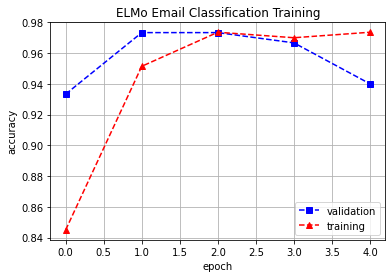

In [19]:
import matplotlib.pyplot as plt

df_history = pd.DataFrame(history.history)

fig,ax = plt.subplots()
plt.plot(range(df_history.shape[0]),df_history['val_acc'],'bs--',label='validation')
plt.plot(range(df_history.shape[0]),df_history['acc'],'r^--',label='training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('ELMo Email Classification Training')
plt.legend(loc='best')
plt.grid()
plt.show()
# Save figures
fig.savefig('ELMoConvergence.eps', format='eps')
fig.savefig('ELMoConvergence.pdf', format='pdf')
fig.savefig('ELMoConvergence.png', format='png')
fig.savefig('ELMoConvergence.svg', format='svg')

In [20]:
from IPython.display import HTML
def create_download_link(title = "Download file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='ELMoConvergence.svg')
